## Motion of a Simple Pendulum
https://projects.skill-lync.com/projects/PYTHON-Motion-of-a-simple-pendulum-37655

Program to simulate the transient behaviour of a 
simple pendulum.
The governing principle behind the simple movement of 
a pendulum can be broken down mathematically using a simple 
ordinary differential equation given by:
   $ \frac{d^2\theta}{dt^2}+(\frac{b}{m})\frac{d\theta}{dt}+(\frac{g}{l})sin(\theta)=0$
   Where,
   $\theta =$ angle between vertical and the string of the pendulum,
   b=damping coefficient,
   m=mass of the bob,
   g=acceleration due to gravity,
   l=length of the pendulum.

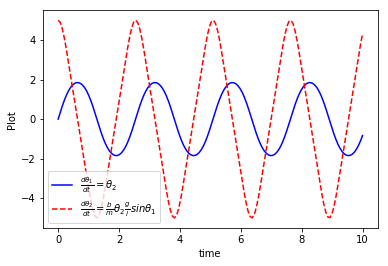

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

# Defining the function for ODE
def model(theta,t,b,g,l,m):
    theta1=theta[0]
    theta2=theta[1]
    dtheta_1=theta2
    dtheta_2=-(b/m)*theta2-(g/l)*math.sin(theta1)
    dtheta_dt=[dtheta_1,dtheta_2]
    return dtheta_dt

#initiatlizing important parameters
# damping coefficient
b=0.0
#length of string
l=1
#acceleration due to gravity
g=9.81
#mass of the bob
m=0.1
#initial condition
theta_0=[0,5]
# time points
t=np.linspace(0,10,150)
#solving ode by function call
theta=odeint(model,theta_0,t,args=(b,g,l,m))
#Plotting the results for transient behaviour
plt.figure
plt.plot(t,theta[:,0],'b-',label=r'$\frac{d\theta_1}{dt}=\theta_2$')
plt.plot(t,theta[:,1],'r--',label=r'$\frac{d\theta_2}{dt}=\frac{b}{m}\theta_2\frac{g}{l}sin\theta_1$')
plt.ylabel("Plot")
plt.xlabel("time")
plt.legend(loc='best')
plt.show
None

Conclusion: We observe that the pendulum initially oscillates and then dampens out.

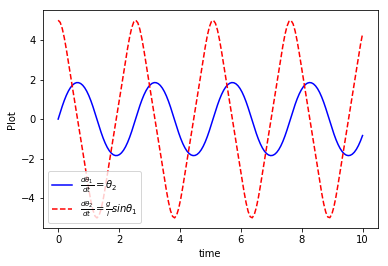

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

# Defining the function for ODE
def model(theta,t,b,g,l,m):
    theta1=theta[0]
    theta2=theta[1]
    dtheta_1=theta2
    dtheta_2=-(b/m)*theta2-(g/l)*math.sin(theta1)
    dtheta_dt=[dtheta_1,dtheta_2]
    return dtheta_dt
#initiatlizing important parameters
# damping coefficient
b=0
#length of string
l=1
#acceleration due to gravity
g=9.81
#mass of the bob
m=0.1
#initial condition
theta_0=[0,5]
# time points
t=np.linspace(0,10,150)
#solving ode by function call
theta=odeint(model,theta_0,t,args=(b,g,l,m))
#Plotting the results for transient behaviour
plt.figure
plt.plot(t,theta[:,0],'b-',label=r'$\frac{d\theta_1}{dt}=\theta_2$')
plt.plot(t,theta[:,1],'r--',label=r'$\frac{d\theta_2}{dt}=\frac{g}{l}sin\theta_1$')
plt.ylabel("Plot")
plt.xlabel("time")
plt.legend(loc='best')
plt.show
None

Conclusion: 

Program to simulate the the motion of the mass on the spring
The governing principle behind the simple movement of 
a pendulum can be broken down mathematically using a simple 
ordinary differential equation given by:
   $m\frac{d^2x}{dt^2}+a\frac{dx}{dt}+kx=F(t)$
   Where,
  * $x$ displacement of the mass from the equillibrium position,
  * m=mass of the object at the end of the string (Kgs)
  *  k=spring constant, Newtons per metre
  * a=damping coefficient, Newton*second / meter 


* for a free, undamped motion $ \frac{d^2x}{dt^2}+\frac{k}{m}x=0$  
* for a free, damped motion  $ m\frac{d^2x}{dt^2}+a\frac{dx}{dt}+kx=0$ 
* for forced motion $m\frac{d^2x}{dt^2}+a\frac{dx}{dt}+kx=F(t)$
        
   Example: $F(t) = cos(4*t-pi/4)$


In [25]:
def MassSpringDamper(state,t):
    k=124e3  # spring constant, kN/m
    m=64.2 # mass, Kg
    a=3  # damping coefficient 
    # unpack the state vector
    x,xd = state # displacement,x and velocity x'
   # g = 9.8 # metres per second**2
   # compute acceleration xdd = x''
   # omega = 1.0 # frequency
   # phi = 0.0 # phase shift
   # A = 5.0 # amplitude
    xdd = -k*x/m -(a/m)*xd + math.cos(4*t - math.pi/4)/m
    return [xd, xdd]

In [22]:
state0 = [0.0, 1.2]  #initial conditions [x0 , v0]  [m, m/sec] 
ti = 0.0  # initial time
tf = 4.0  # final time
step = 0.001  # step
t = np.arange(ti, tf, step)
state = odeint(MassSpringDamper, state0, t)
x = np.array(state[:,[0]])
xd = np.array(state[:,[1]])

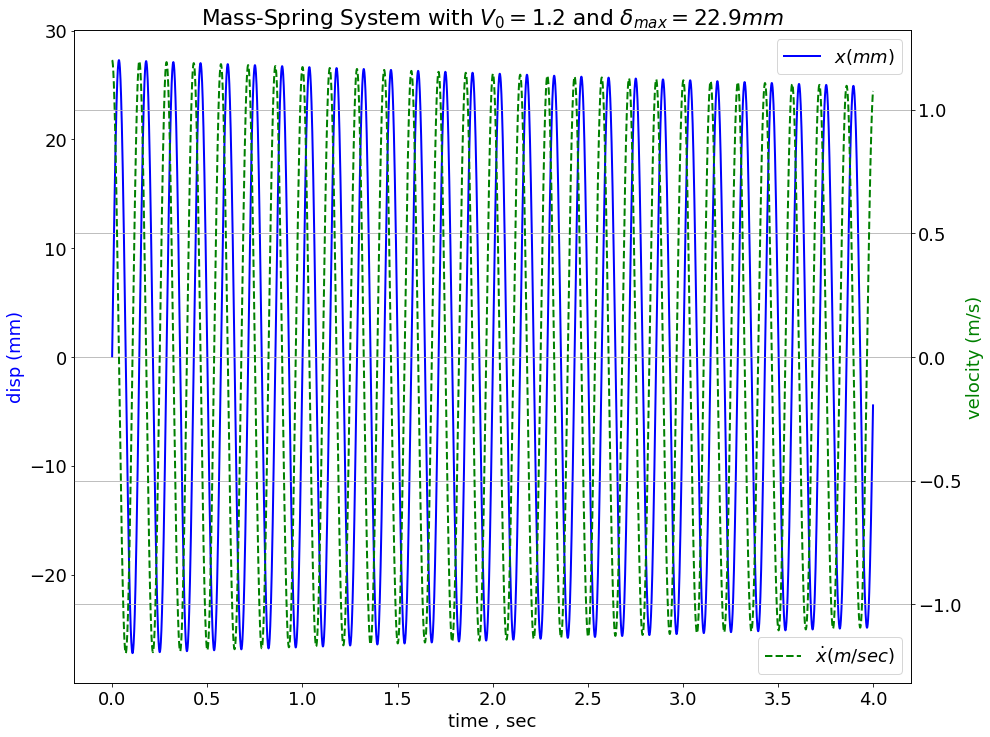

In [23]:
# Plotting displacement and velocity
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 18

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() # ax2 and ax1 will have common x axis and different y axis
ax1.plot(t,x*1e3,'b',label = r'$x (mm)$', linewidth=2.0)
ax2.plot(t,xd,'g--',label = r'$\dot{x} (m/sec)$', linewidth=2.0)
ax2.legend(loc='lower right')
ax1.legend()
ax1.set_xlabel('time , sec')
ax1.set_ylabel('disp (mm)',color='b')
ax2.set_ylabel('velocity (m/s)',color='g')
plt.title('Mass-Spring System with $V_0=1.2 \frac{m}{s}$ and $\delta_{max}=22.9mm$')
plt.grid()